In [21]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
#########################
#
# Data Generation Code
#
#########################
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5   ko1   ko2  ko3   ko4  ko5
gene1  410  376  376  424  410   819   800  843   939  870
gene2  914  904  947  966  906  1003  1012  965  1007  968
gene3  163  187  161  152  183   660   641  619   674  644
gene4  531  538  571  533  572   909   937  922   861  917
gene5  250  232  247  236  243   949  1016  934   972  945
(100, 10)


In [26]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T) 
# scaled_data = StandardScaler().fit_transform(data.T) # same as above
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

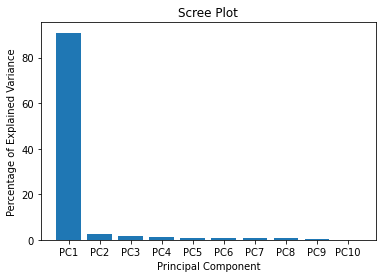

In [27]:
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

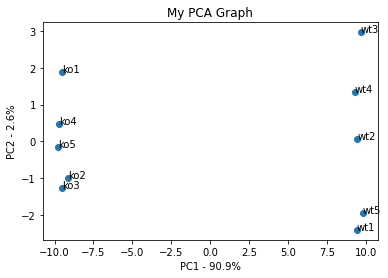

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.427766,-2.401285,-2.423744,-0.304901,0.340771,-0.620632,-0.231529,-1.028825,0.027141,3.656691e-15
wt2,9.457912,0.056064,-0.047223,2.160925,-0.771890,0.207387,-0.484894,0.618725,-0.970425,3.304725e-15
wt3,9.685035,2.962067,-0.561482,-1.305737,-0.381104,-1.322816,0.000845,0.664957,0.200564,-2.353653e-15
wt4,9.309725,1.347675,0.155342,-0.252279,0.485002,2.212028,-0.322987,-0.364910,0.598816,-1.711704e-15
wt5,9.789044,-1.934813,2.804668,-0.235903,0.311312,-0.439152,1.058260,0.087095,0.164206,9.564668e-16
ko1,-9.534971,1.878225,0.698404,0.954944,1.730276,-0.725787,-0.091642,-0.928638,-0.331689,-1.475030e-15
ko2,-9.144632,-0.983608,1.152945,-1.775651,-0.494241,0.202610,-1.394713,-0.007932,-0.636182,6.988714e-16
ko3,-9.508869,-1.255073,-1.113632,0.174268,1.265775,0.203817,0.070065,1.593736,0.400437,2.245948e-16
ko4,-9.715111,0.473942,-0.984903,-0.550628,-0.914204,0.719940,1.684759,-0.273384,-0.624902,6.014635e-16
ko5,-9.765899,-0.143195,0.319625,1.134961,-1.571698,-0.437395,-0.288163,-0.360824,1.172036,9.462778e-17


In [51]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [62]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene8     0.104816
gene71    0.104790
gene51   -0.104764
gene55   -0.104763
gene77   -0.104755
gene35   -0.104752
gene64   -0.104750
gene37    0.104745
gene46   -0.104718
gene38   -0.104717
dtype: float64


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,410,376,376,424,410,819,800,843,939,870
gene2,914,904,947,966,906,1003,1012,965,1007,968
gene3,163,187,161,152,183,660,641,619,674,644
gene4,531,538,571,533,572,909,937,922,861,917
gene5,250,232,247,236,243,949,1016,934,972,945
gene6,344,366,327,361,344,179,189,170,155,180
gene7,310,258,249,271,250,689,689,649,680,735
gene8,753,779,778,785,779,77,63,66,64,61
gene9,309,278,271,247,271,175,197,190,198,206
gene10,483,522,515,435,500,391,417,373,396,410
